In [1]:
from mylib.dsp.route_decode import decode_routes
import pickle

if __name__ == '__main__':
    with open(r"E:\Data\Dsp_maze\10224\20231014\trace.pkl", 'rb') as handle:
        trace = pickle.load(handle)
    
    y_pred, y_test, x_test = decode_routes(trace, n_cross_times=10, is_control=True)
    print(y_pred)
    print(y_test)
    
    #with open(r"E:\Data\Dsp_maze\10224\20231014\demo_decode_results_rbf.pkl", 'wb') as handle:
    #    pickle.dump([y_pred, y_test, x_test], handle)


  0%|          | 0/10 [00:00<?, ?it/s]e:\Anaconda\envs\maze\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 10%|█         | 1/10 [00:47<07:09, 47.76s/it]e:\Anaconda\envs\maze\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 20%|██        | 2/10 [01:35<06:24, 48.02s/it]e:\Anaconda\envs\maze\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
 30%|███       | 3/10 [02:24<05:36, 48.06s/it]e:\Anaconda\envs\maze\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with Stand

[0 0 0 ... 0 0 0]
[0 0 0 ... 6 6 6]


In [2]:
from mylib.maze_utils3 import spike_nodes_transform
from mylib.maze_graph import CorrectPath_maze_1 as CP

x_test_converted = spike_nodes_transform(spike_nodes = x_test, nx = 12)

In [3]:
x_test, x_test_converted, y_pred, y_test

(array([ 194.,  194.,  193., ..., 2109., 2110., 2110.]),
 array([ 13,  13,  13, ..., 132, 132, 132], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 6, 6, 6], dtype=int64))

In [4]:
x_test.shape, x_test_converted.shape, y_pred.shape, y_test.shape

((1926,), (1926,), (1926,), (1926,))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mylib.dsp.route_decode import compute_accuracy

accuracy = compute_accuracy(y_pred, y_test, x_test_converted)

ZeroDivisionError: division by zero

(0.0, 1.0)

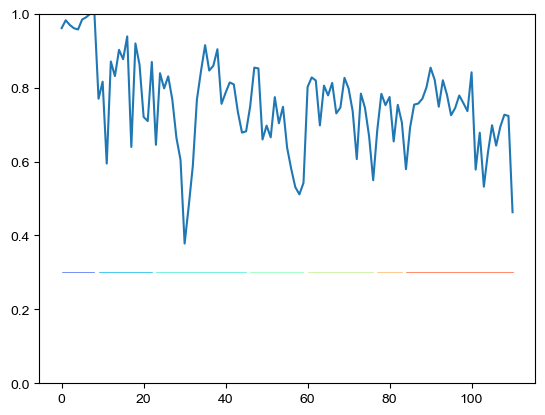

In [6]:
from mylib.statistic_test import plot_segments
ax = plt.axes()
ax.plot(accuracy)
plot_segments(ax, dy = 0.3)
plt.ylim(0, 1)